In [3]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [4]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker,data_source='yahoo',
                             start='2007-1-1')['Adj Close']

In [6]:
log_returns = np.log(1 + data.pct_change())

In [9]:
log_returns.tail()

,PG
Date,
2020-06-03,0.003973
2020-06-04,-0.021145
2020-06-05,0.019456
2020-06-08,0.006066
2020-06-09,-0.005982


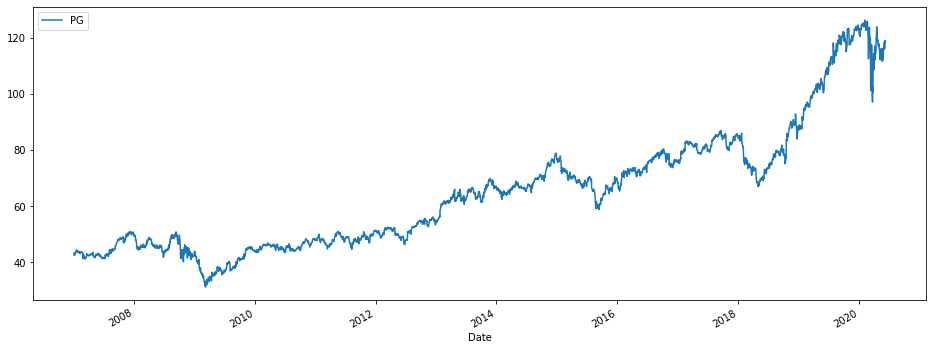

In [8]:
data.plot(figsize=(16,6));

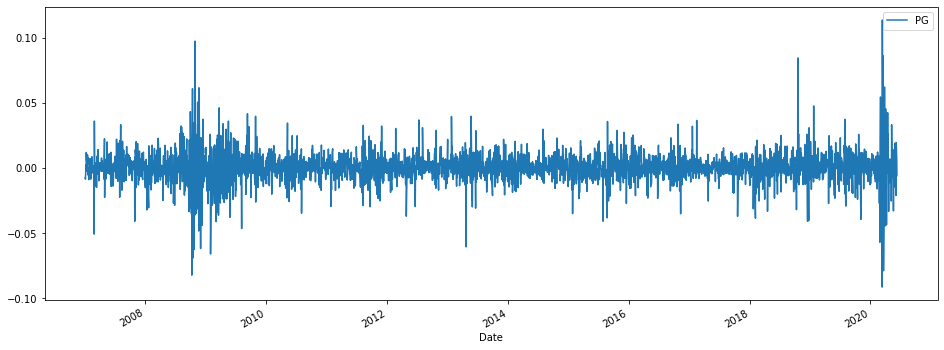

In [10]:
log_returns.plot(figsize=(16,6));

In [13]:
u =log_returns.mean()
u

PG    0.000298
dtype: float64

In [14]:
var = log_returns.var()
var

PG    0.000143
dtype: float64

In [15]:
drift = u - (0.5 * var)
drift

PG    0.000227
dtype: float64

In [16]:
stddev = log_returns.std()
stddev

PG    0.011966
dtype: float64

In [17]:
type(drift)

pandas.core.series.Series

In [19]:
type(stddev)

pandas.core.series.Series

In [20]:
np.array(drift)

array([0.00022682])

In [21]:
drift.values

array([0.00022682])

In [22]:
stddev.values

array([0.01196618])

In [24]:
norm.ppf(0.95)

1.6448536269514722

In [25]:
x = np.random.rand(10,2)
x

array([[0.30994664, 0.95935089],
       [0.92495797, 0.4559961 ],
       [0.34723903, 0.15228601],
       [0.30677723, 0.1258206 ],
       [0.3261412 , 0.46659527],
       [0.06247798, 0.27302909],
       [0.43086133, 0.19296348],
       [0.2447739 , 0.03392271],
       [0.3909654 , 0.44845102],
       [0.50299702, 0.20837212]])

In [26]:
norm.ppf(x)

array([[-0.4960016 ,  1.74320269],
       [ 1.43923461, -0.11052605],
       [-0.39278529, -1.02667819],
       [-0.50500624, -1.14637215],
       [-0.45059371, -0.08383132],
       [-1.53429963, -0.60367733],
       [-0.17418171, -0.86702748],
       [-0.69102823, -1.82603217],
       [-0.27680374, -0.12957581],
       [ 0.00751247, -0.8120826 ]])

In [27]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-1.61923623,  0.22637841],
       [-0.84788785,  0.70684599],
       [ 0.18649316,  0.81920617],
       [-0.95219799,  1.05415678],
       [ 1.23248629,  1.92534629],
       [-1.10328796,  1.34909003],
       [-1.68911544,  0.99531127],
       [ 0.08613826,  1.29755144],
       [ 0.76350096,  0.44771734],
       [ 0.00347105, -0.45412607]])

In [28]:
t_intervals = 1000
iterations = 10

In [29]:
daily_returns = np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [30]:
daily_returns

array([[0.99962852, 0.99342831, 0.9888623 , ..., 1.00949082, 1.02458915,
        1.00984228],
       [0.98207349, 1.01765383, 1.00295937, ..., 0.9857231 , 0.98742743,
        1.0114061 ],
       [1.00955785, 1.0120998 , 0.98411   , ..., 1.00406258, 1.00949786,
        0.98896251],
       ...,
       [0.99324831, 1.00349018, 0.99493991, ..., 0.99894252, 1.00239973,
        1.01529313],
       [1.01048702, 0.97741607, 1.00902876, ..., 1.02189462, 1.00569544,
        0.99378957],
       [0.9898147 , 1.00524932, 0.99166395, ..., 0.99678372, 1.00823161,
        0.99746544]])